In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

def process_gait_data1(csv_file):
    df = pd.read_csv(csv_file)

    # Drop NaN and infinite values
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(subset=['X', 'Y'], inplace=True)

    # Convert X and Y to integers
    df['X'] = df['X'].astype(int)
    df['Y'] = df['Y'].astype(int)

    # Get min/max for defining grid size
    x_min, x_max = df['X'].min(), df['X'].max()
    y_min, y_max = df['Y'].min(), df['Y'].max()

    # Define grid size based on actual X, Y range
    grid_width = x_max - x_min + 1
    grid_height = y_max - y_min + 1

    # Create empty footprint grid
    footprint_grid = np.zeros((grid_height, grid_width), dtype=np.uint8)

    # Populate grid with footprint data
    for x, y in zip(df['X'], df['Y']):
        footprint_grid[y - y_min, x - x_min] = 1  # Adjust based on min values

    # Label connected components
    num_labels, labels = cv2.connectedComponents(footprint_grid, connectivity=8)

    # Filter out small disconnected components
    valid_mask = np.zeros_like(footprint_grid)
    for label in range(1, num_labels):  # Skip background (label 0)
        if np.sum(labels == label) >= 12:  # Keep only components with at least 12 pixels
            valid_mask[labels == label] = 1

    # Display filtered footprint
    plt.figure(figsize=(80, 32))
    plt.imshow(valid_mask, cmap='gray', origin='upper')
    plt.title("Final Binary Footprint Signature (Filtered)")
    plt.axis('equal')
    plt.show()



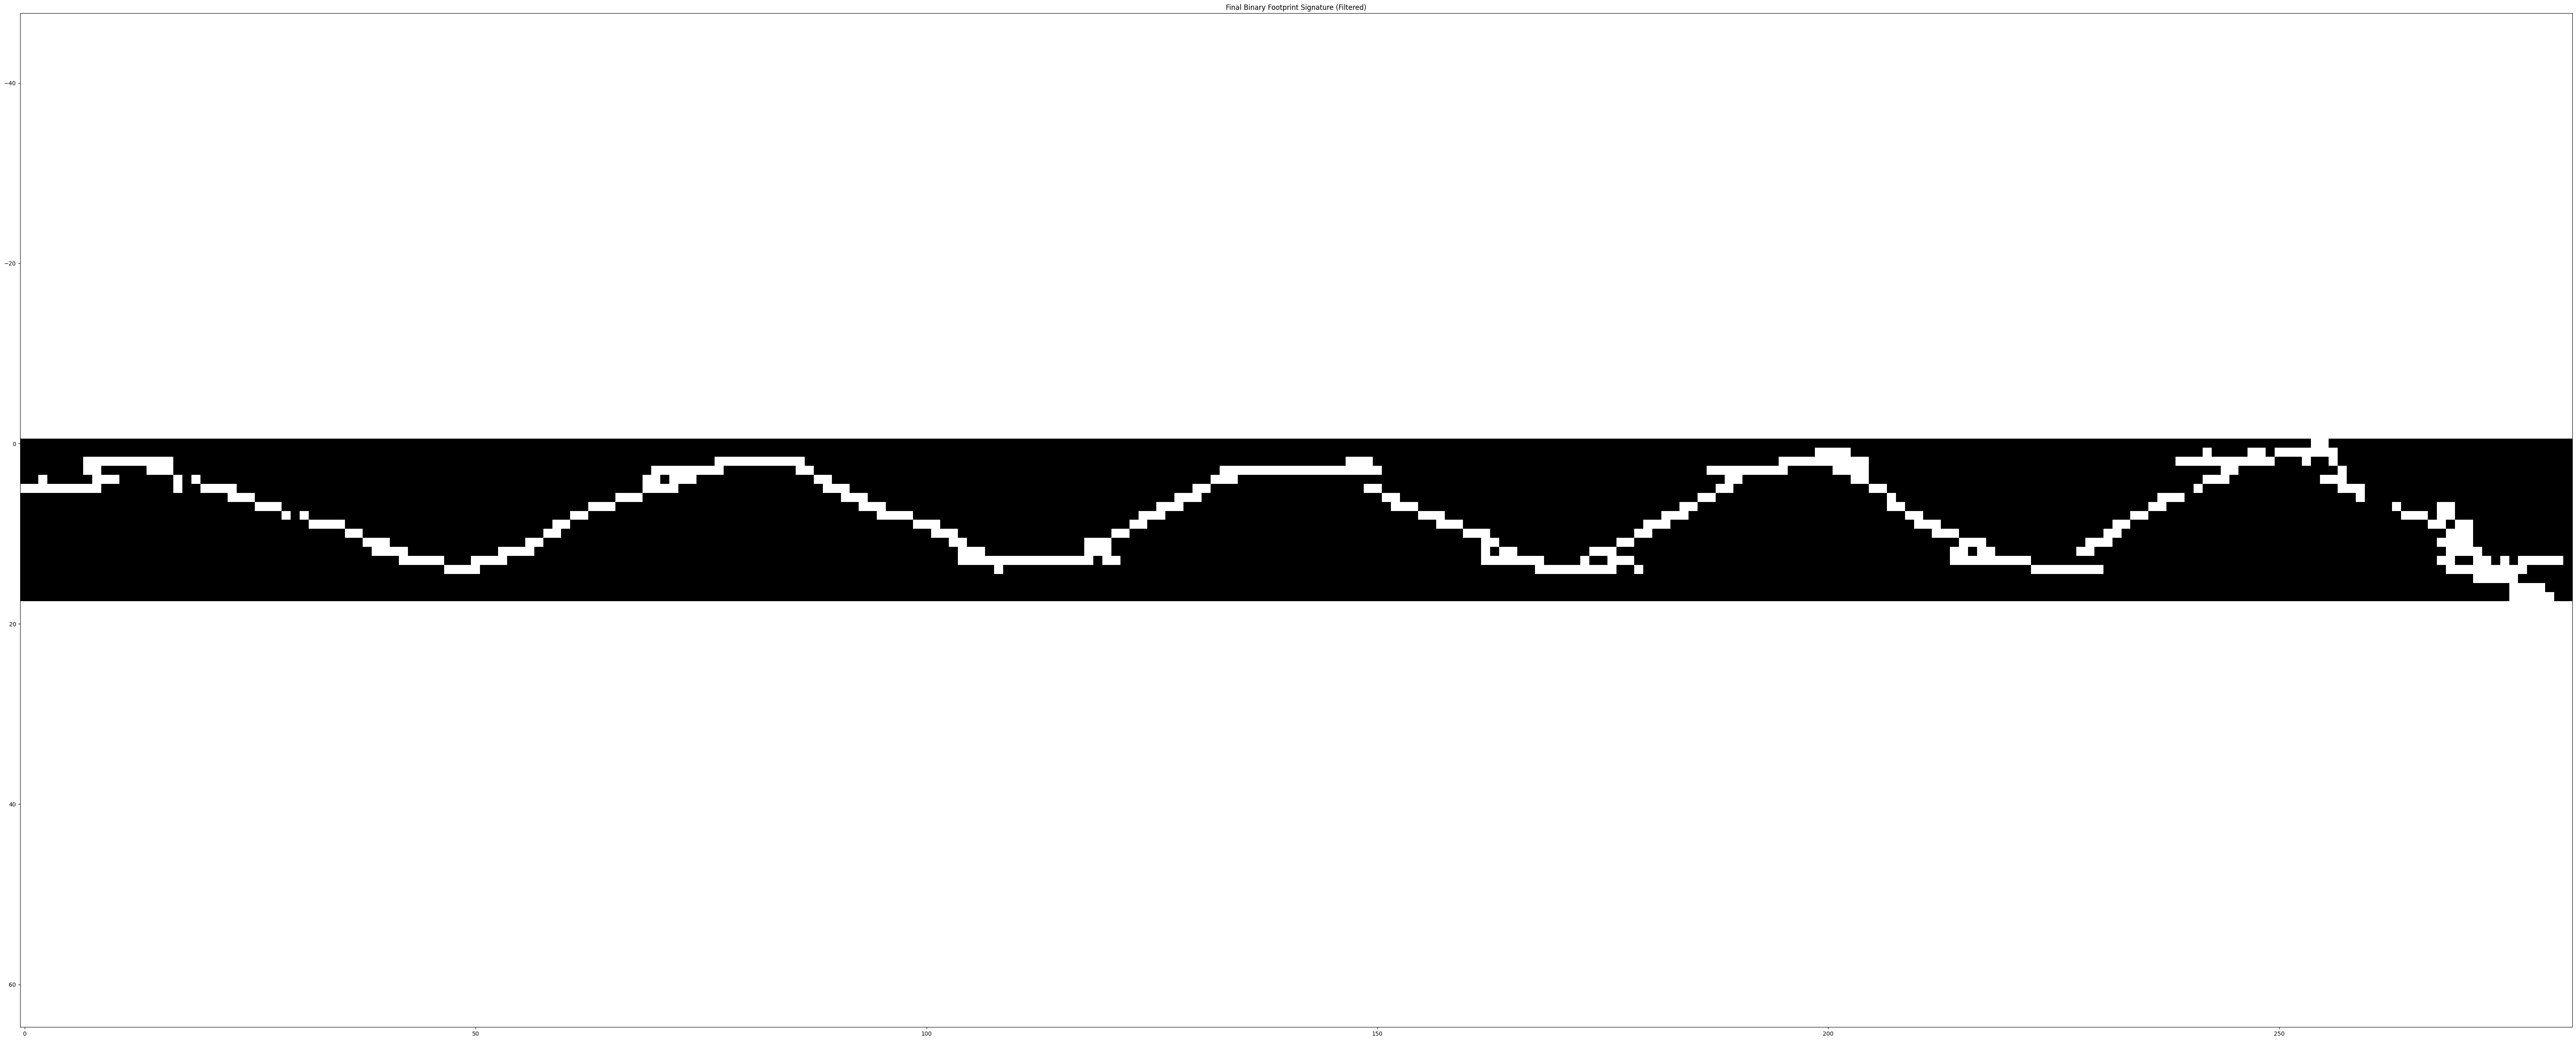

In [ ]:

# Example Usage:
process_gait_data1('/content/csv_13.3.25GaitCop.csv')

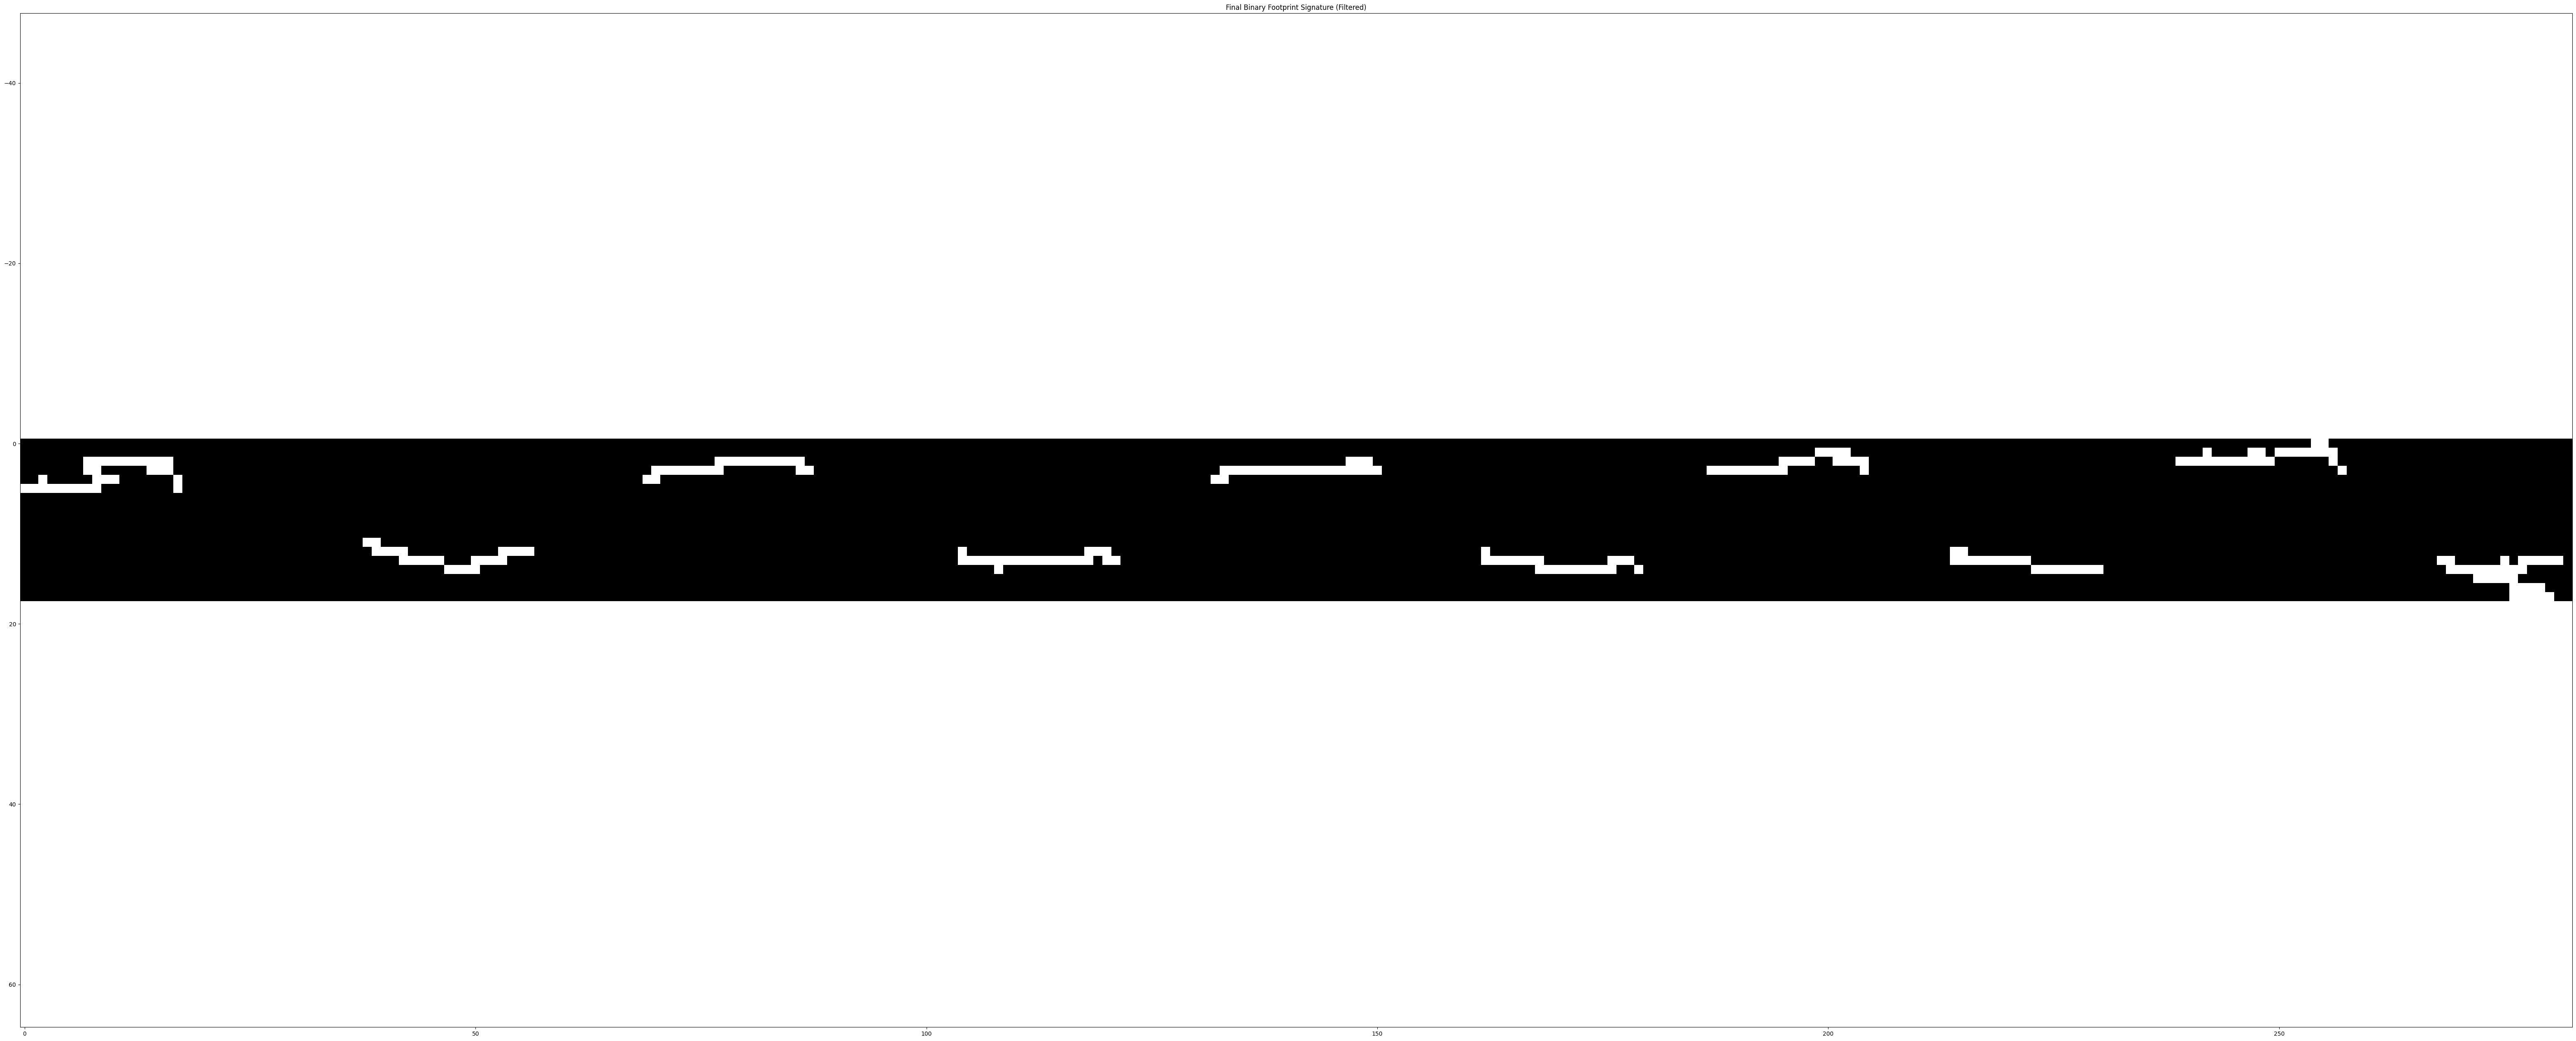

In [25]:
process_gait_data4('/content/csv_13.3.25GaitCop.csv', 1919)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def process_gait_data2(csv_file):
    df = pd.read_csv(csv_file)

    # Drop NaN and infinite values
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(subset=['X', 'Y'], inplace=True)

    # Normalize X and Y coordinates
    df['X_norm'] = ((df['X'] - df['X'].min()) / (df['X'].max() - df['X'].min()) * 99).astype(int)
    df['Y_norm'] = ((df['Y'] - df['Y'].min()) / (df['Y'].max() - df['Y'].min()) * 99).astype(int)

    # Remove out-of-bounds values
    df_cleaned = df[(df['X_norm'] >= 0) & (df['X_norm'] < 100) &
                    (df['Y_norm'] >= 0) & (df['Y_norm'] < 100)]

    # Create empty footprint grid
    footprint_grid = np.zeros((100, 100), dtype=int)

    # Populate grid with footprint data
    for x, y in zip(df_cleaned['X_norm'], df_cleaned['Y_norm']):
        footprint_grid[y, x] = 1  # Flip y-axis for correct orientation

    # Display footprint
    plt.figure(figsize=(80, 32))
    plt.imshow(footprint_grid, cmap='gray', origin='upper')
    plt.title("Final Binary Footprint Signature")
    plt.axis('equal')
    plt.show()




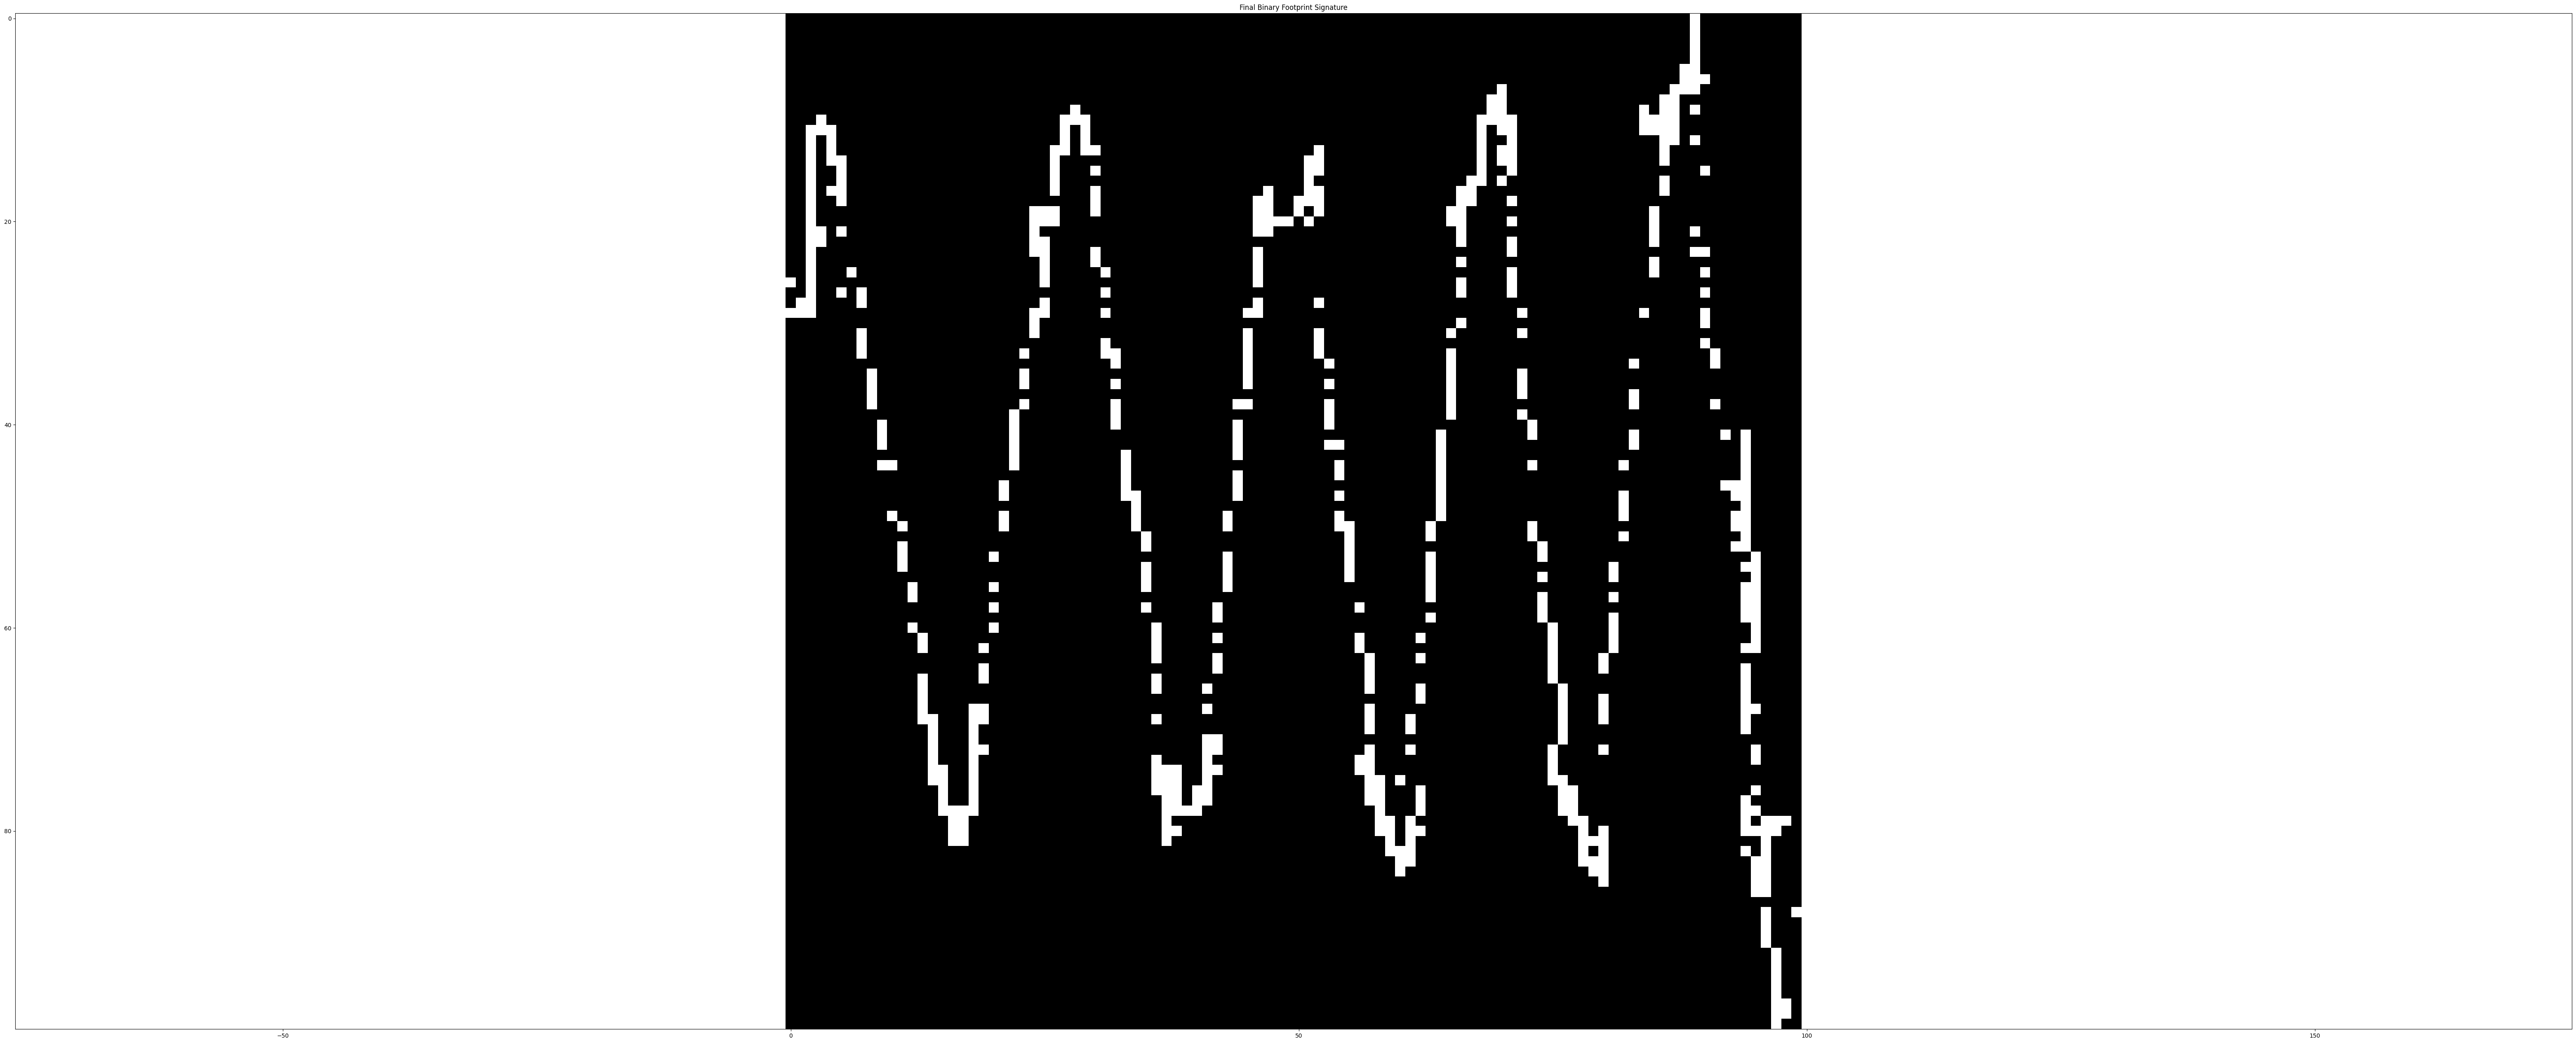

In [ ]:
# Example Usage:
process_gait_data2('/content/csv_13.3.25GaitCop.csv')

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

def process_gait_data3(csv_file):
    df = pd.read_csv(csv_file)

    # Drop NaN and infinite values
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(subset=['X', 'Y'], inplace=True)

    # Normalize X and Y coordinates
    df['X_norm'] = ((df['X'] - df['X'].min()) / (df['X'].max() - df['X'].min()) * 99).astype(int)
    df['Y_norm'] = ((df['Y'] - df['Y'].min()) / (df['Y'].max() - df['Y'].min()) * 99).astype(int)

    # Remove out-of-bounds values
    df_cleaned = df[(df['X_norm'] >= 0) & (df['X_norm'] < 100) &
                    (df['Y_norm'] >= 0) & (df['Y_norm'] < 100)]

    # Create empty footprint grid
    footprint_grid = np.zeros((100, 100), dtype=np.uint8)

    # Populate grid with footprint data
    for x, y in zip(df_cleaned['X_norm'], df_cleaned['Y_norm']):
        footprint_grid[y, x] = 1  # Flip y-axis for correct orientation, 1 == true if point detected

    # Label connected components
    num_labels, labels = cv2.connectedComponents(footprint_grid, connectivity=8)

    # Filter out small disconnected components
    valid_mask = np.zeros_like(footprint_grid)
    for label in range(1, num_labels):
        if np.sum(labels == label) >= 12:  # Keep only components with at least n pixels
            valid_mask[labels == label] = 1

    # Display filtered footprint
    plt.figure(figsize=(80, 32))
    plt.imshow(valid_mask, cmap='gray', origin='upper')
    plt.title("Final Binary Footprint Signature (Filtered)")
    plt.axis('equal')
    plt.show()




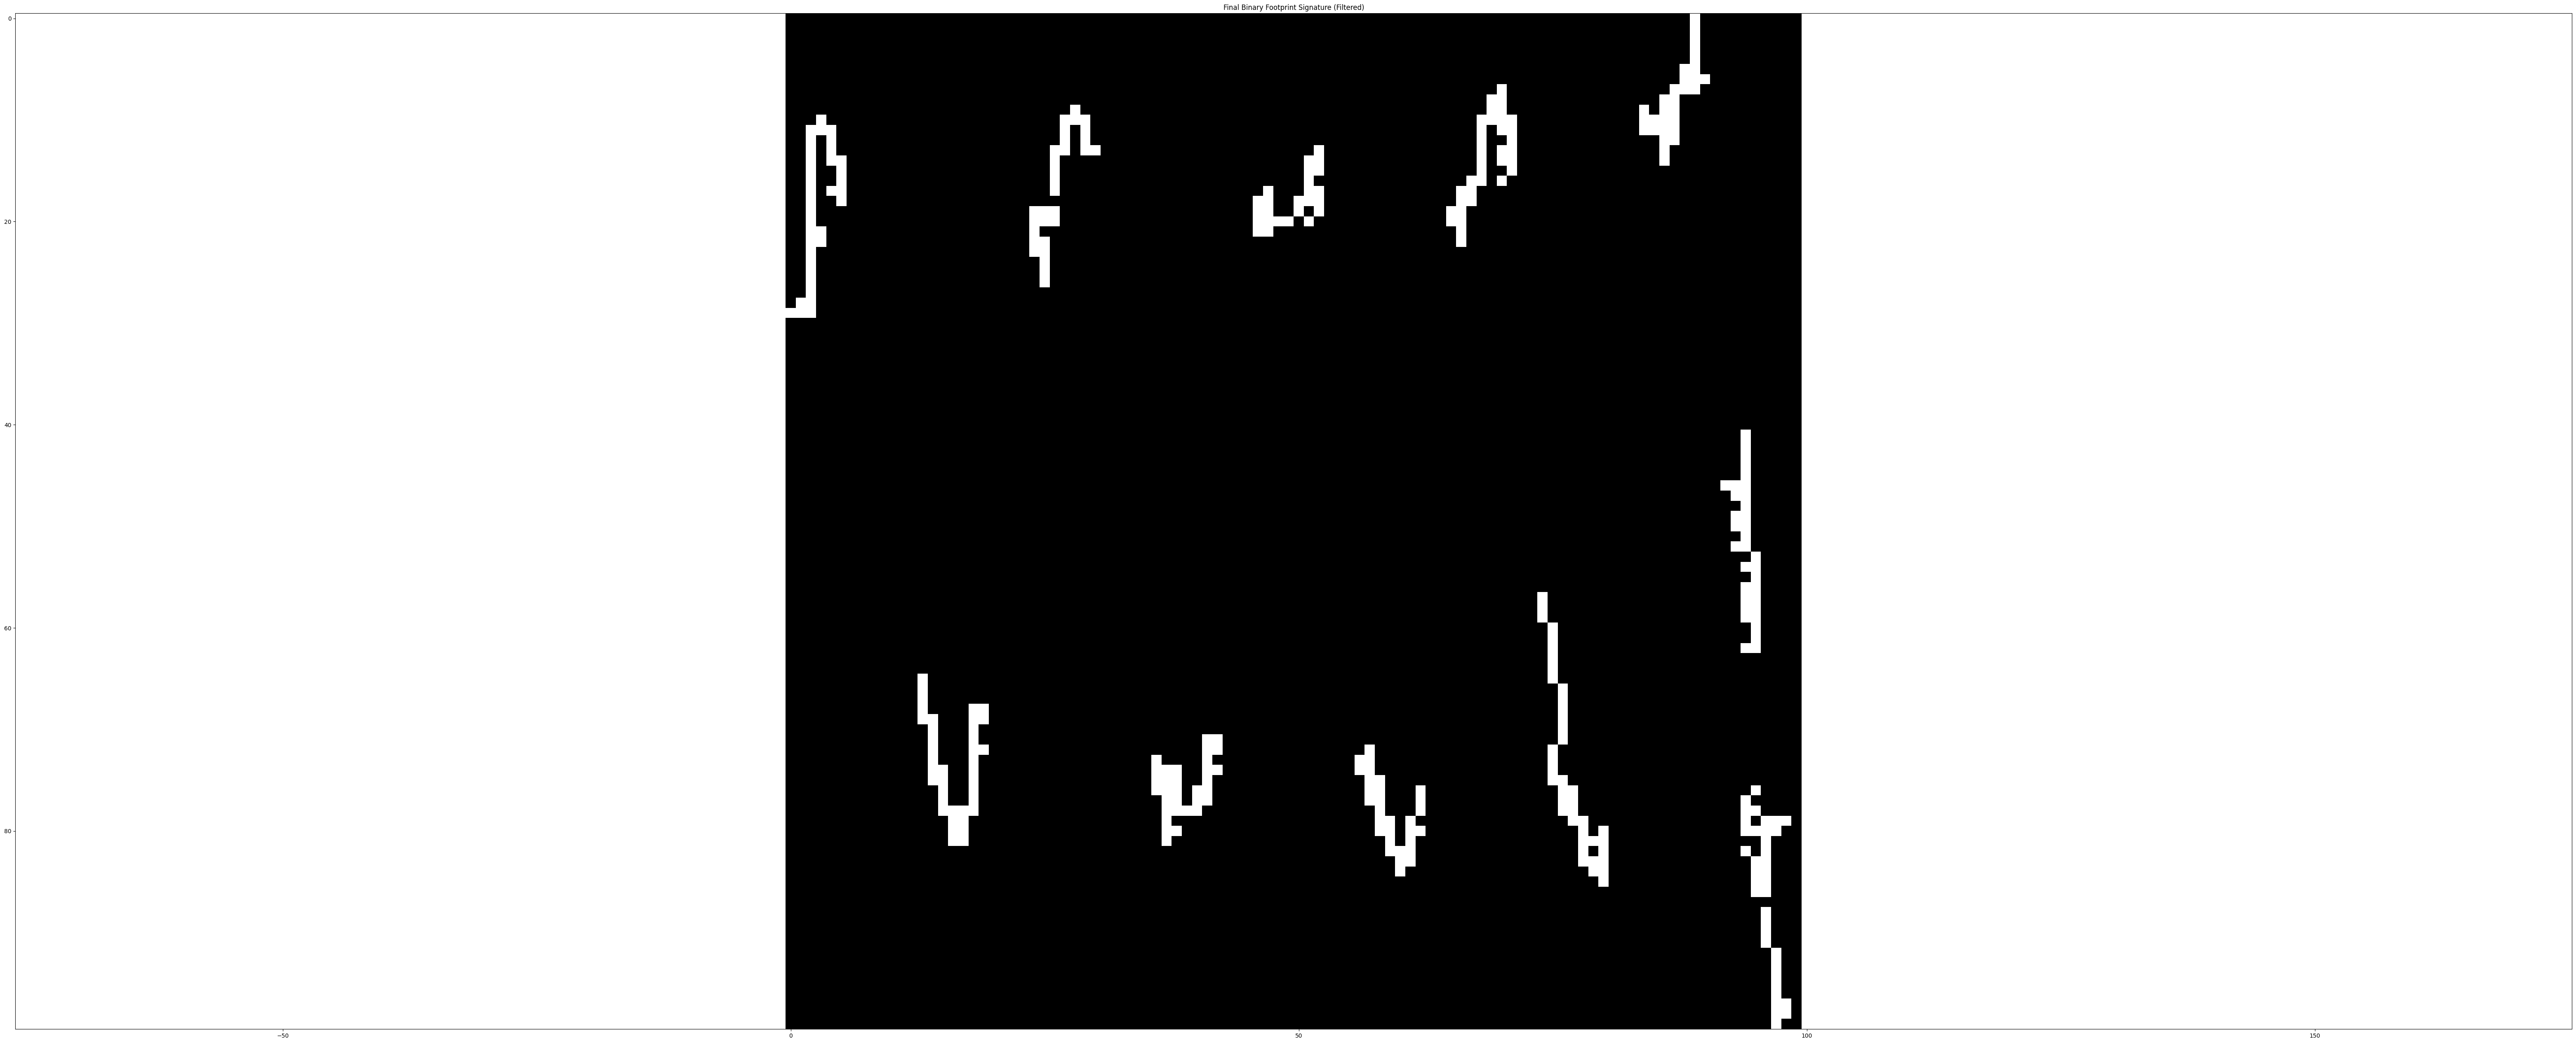

In [ ]:
# Example Usage:
process_gait_data3('/content/csv_13.3.25GaitCop.csv')

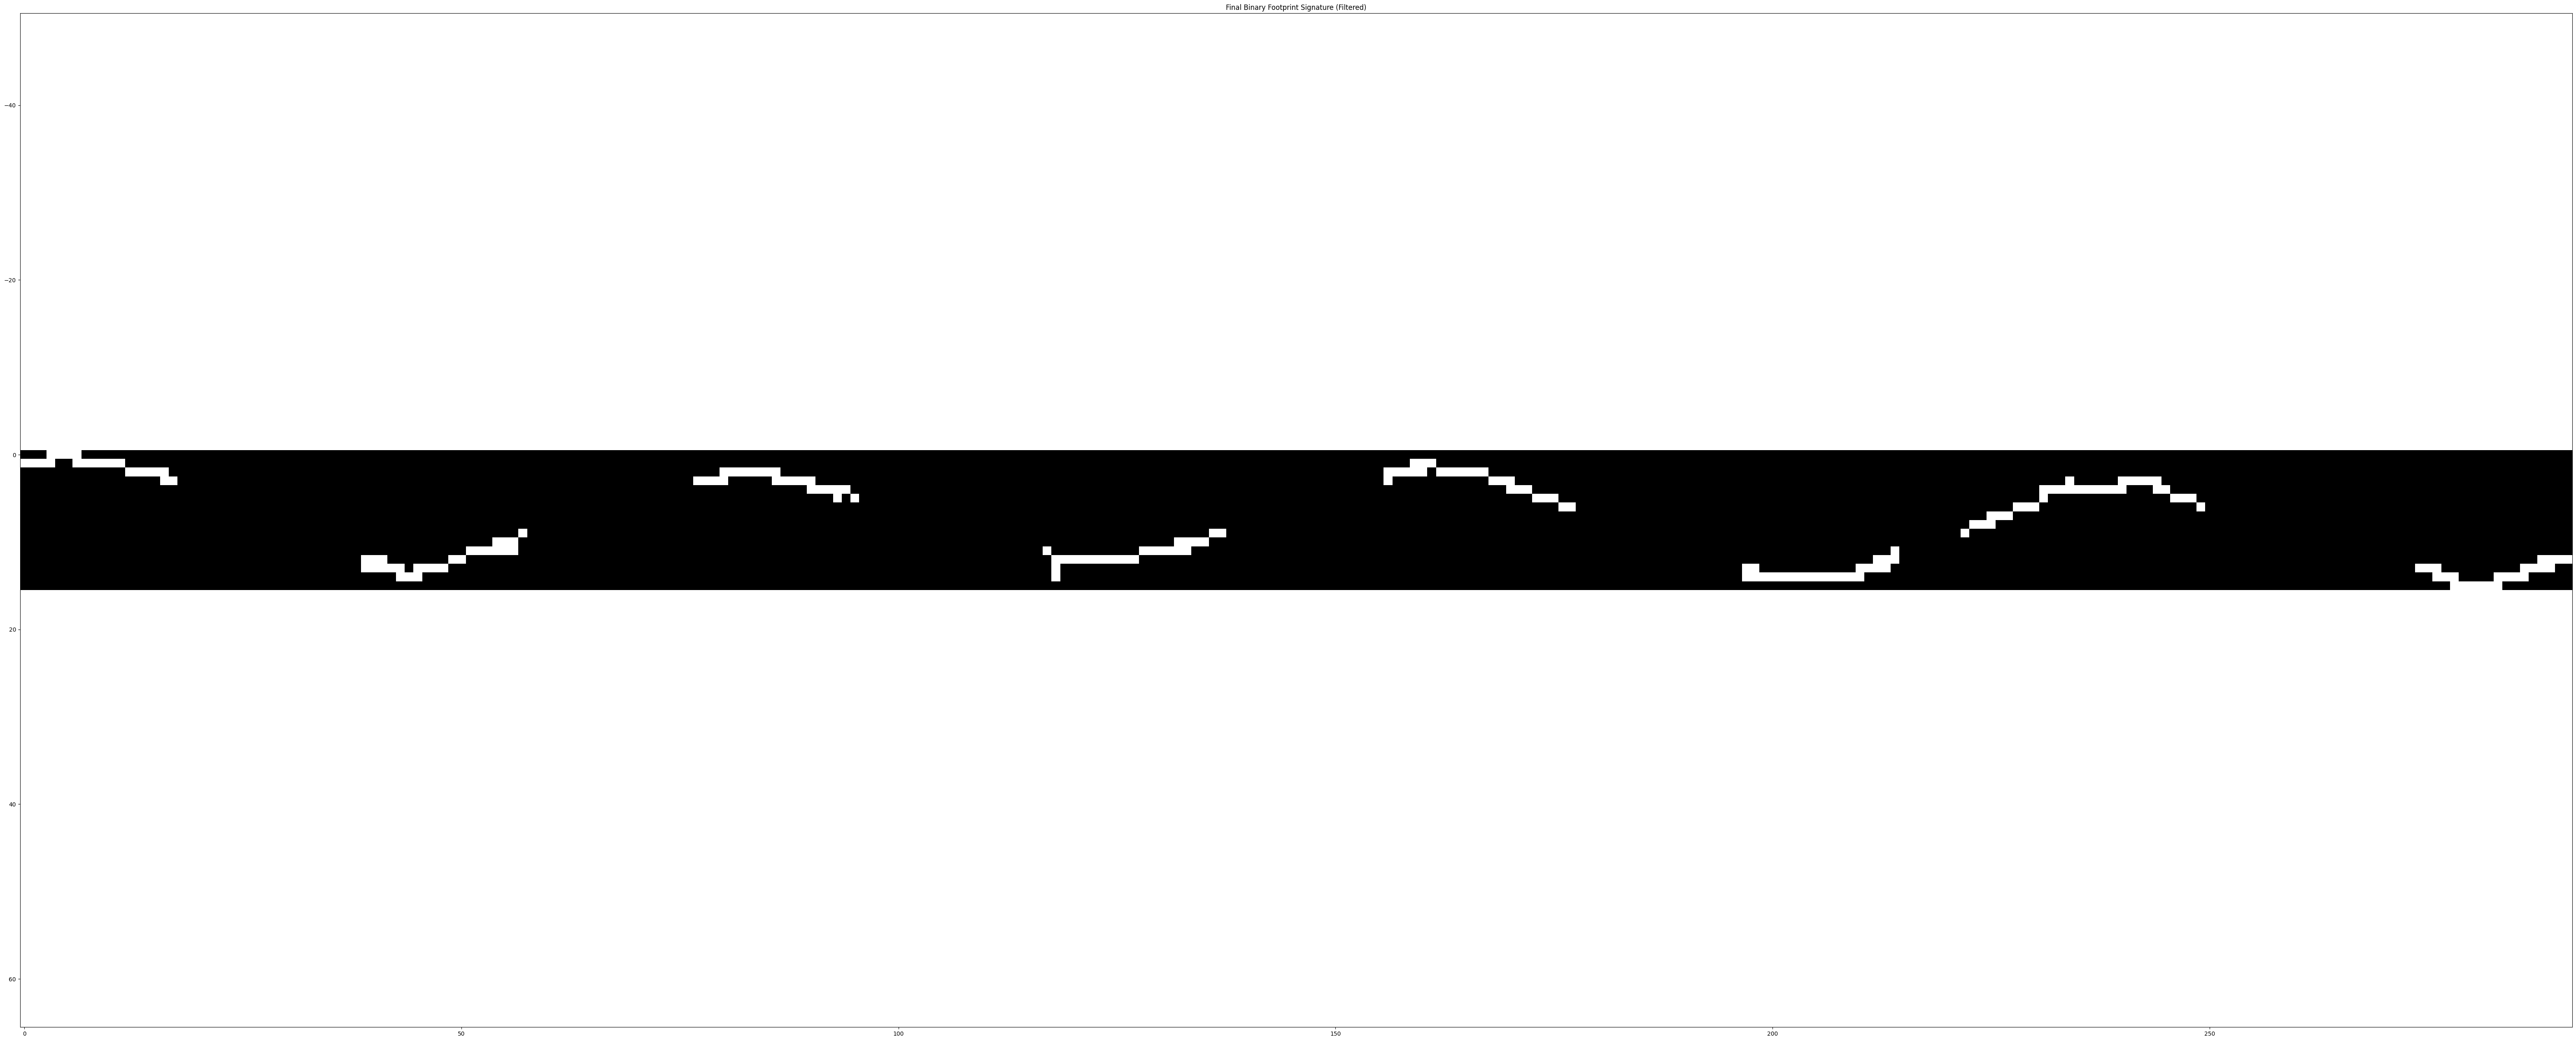

In [ ]:
# Example Usage:
process_gait_data1('/content/1GaitCop.csv')

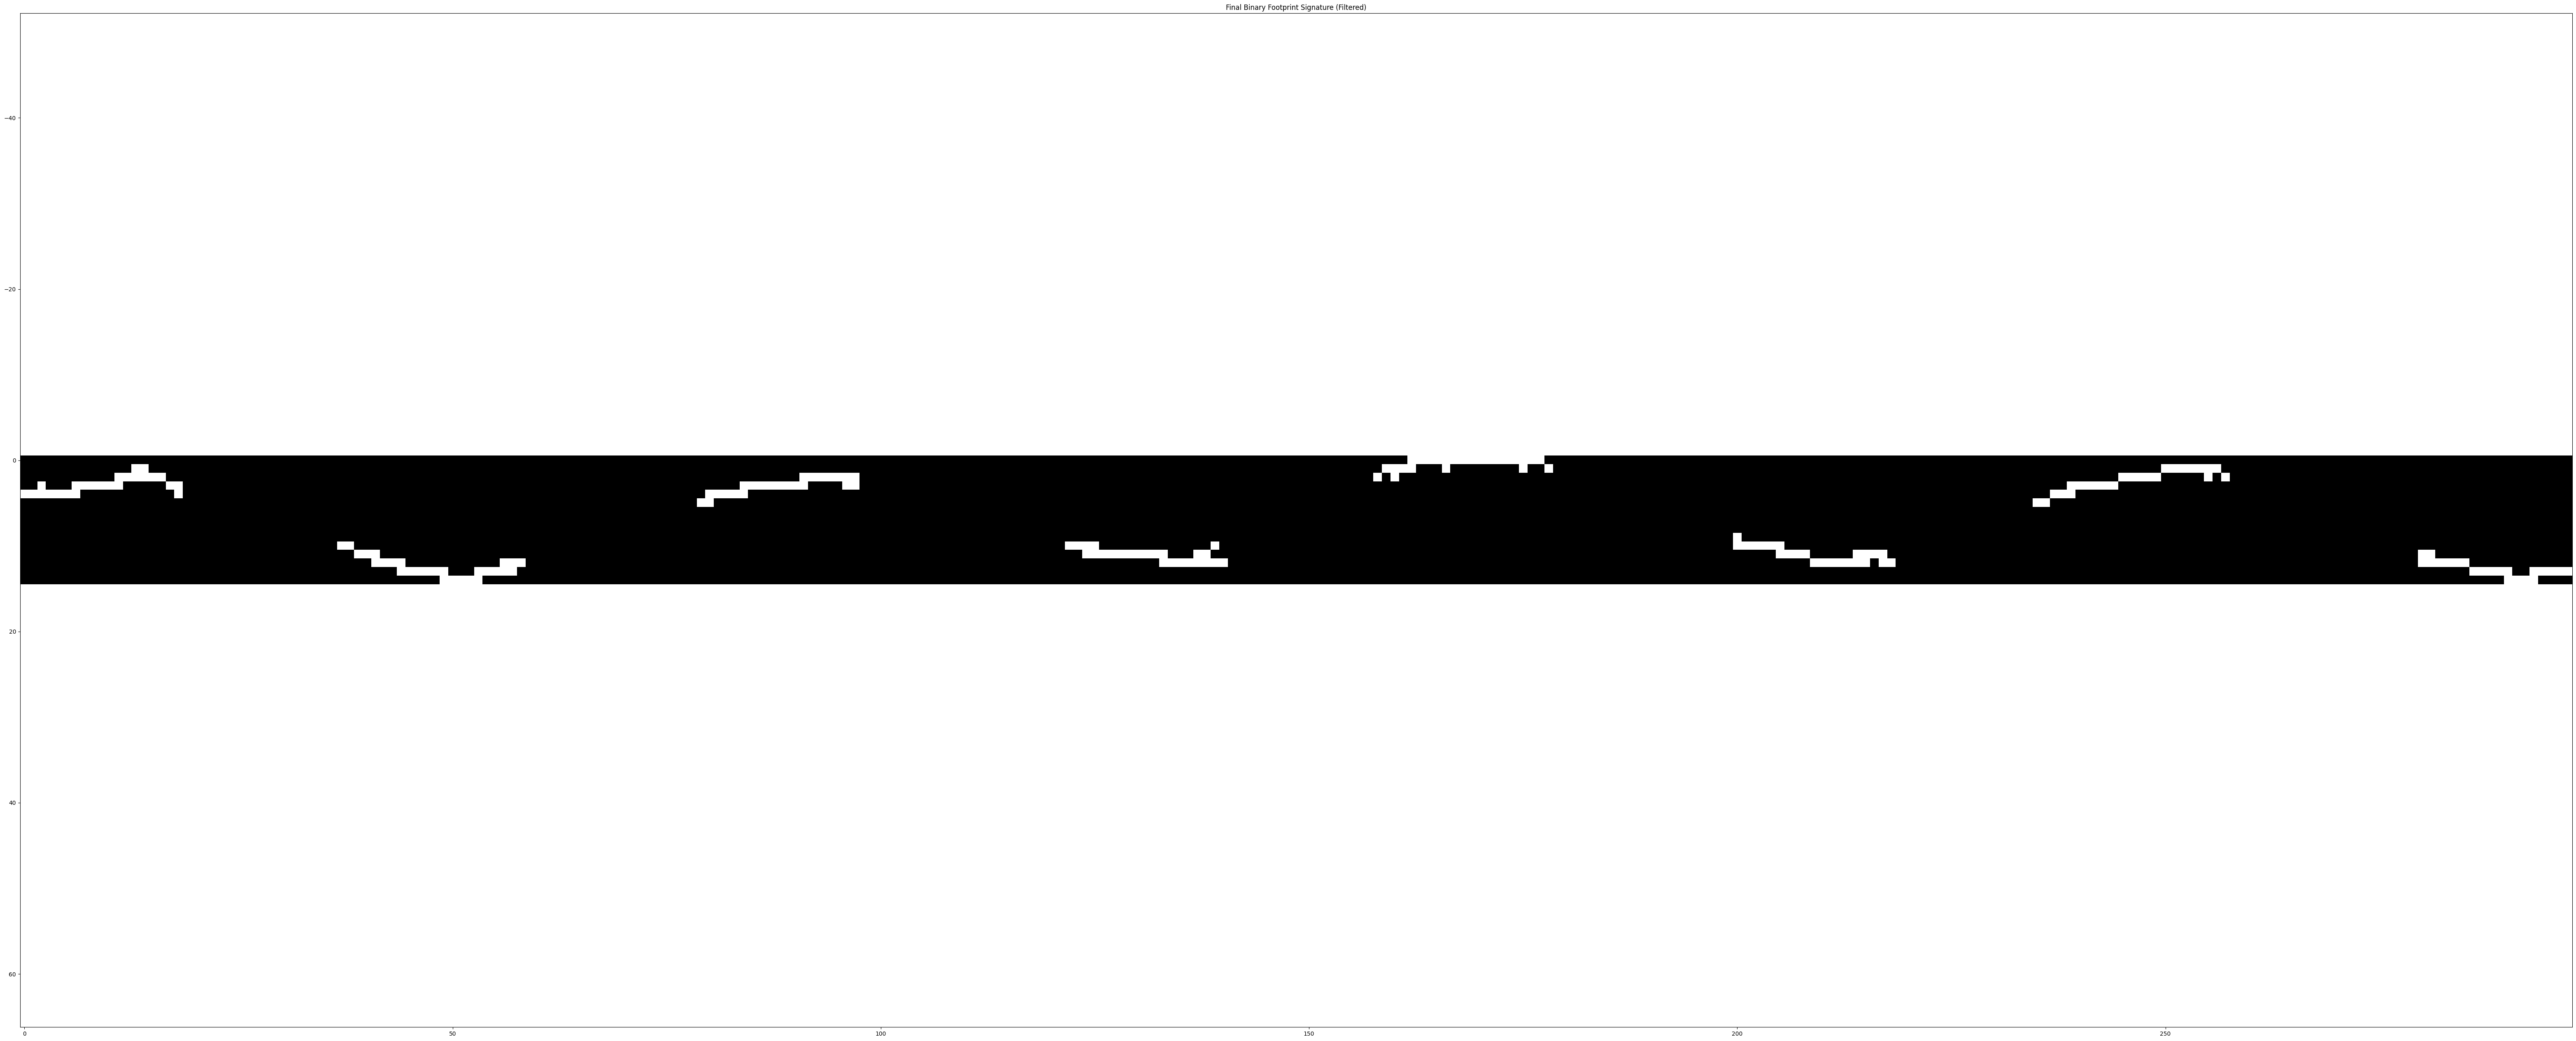

In [ ]:
# Example Usage:
process_gait_data1('/content/2GaitCop.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

def process_gait_data4(csv_file, n_rows):
    df = pd.read_csv(csv_file, nrows=n_rows)

    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(subset=['X', 'Y'], inplace=True)

    df['X'] = df['X'].astype(int)
    df['Y'] = df['Y'].astype(int)

    x_min, x_max = df['X'].min(), df['X'].max()
    y_min, y_max = df['Y'].min(), df['Y'].max()

    grid_width = x_max - x_min + 1
    grid_height = y_max - y_min + 1

    footprint_grid = np.zeros((grid_height, grid_width), dtype=np.uint8)

    for x, y in zip(df['X'], df['Y']):
        footprint_grid[y - y_min, x - x_min] = 1

    num_labels, labels = cv2.connectedComponents(footprint_grid, connectivity=8)

    valid_mask = np.zeros_like(footprint_grid)
    for label in range(1, num_labels):
        if np.sum(labels == label) >= 12:
            valid_mask[labels == label] = 1

    plt.figure(figsize=(80, 32))
    plt.imshow(valid_mask, cmap='gray', origin='upper')
    plt.title("Final Binary Footprint Signature (Filtered)")
    plt.axis('equal')
    plt.show()


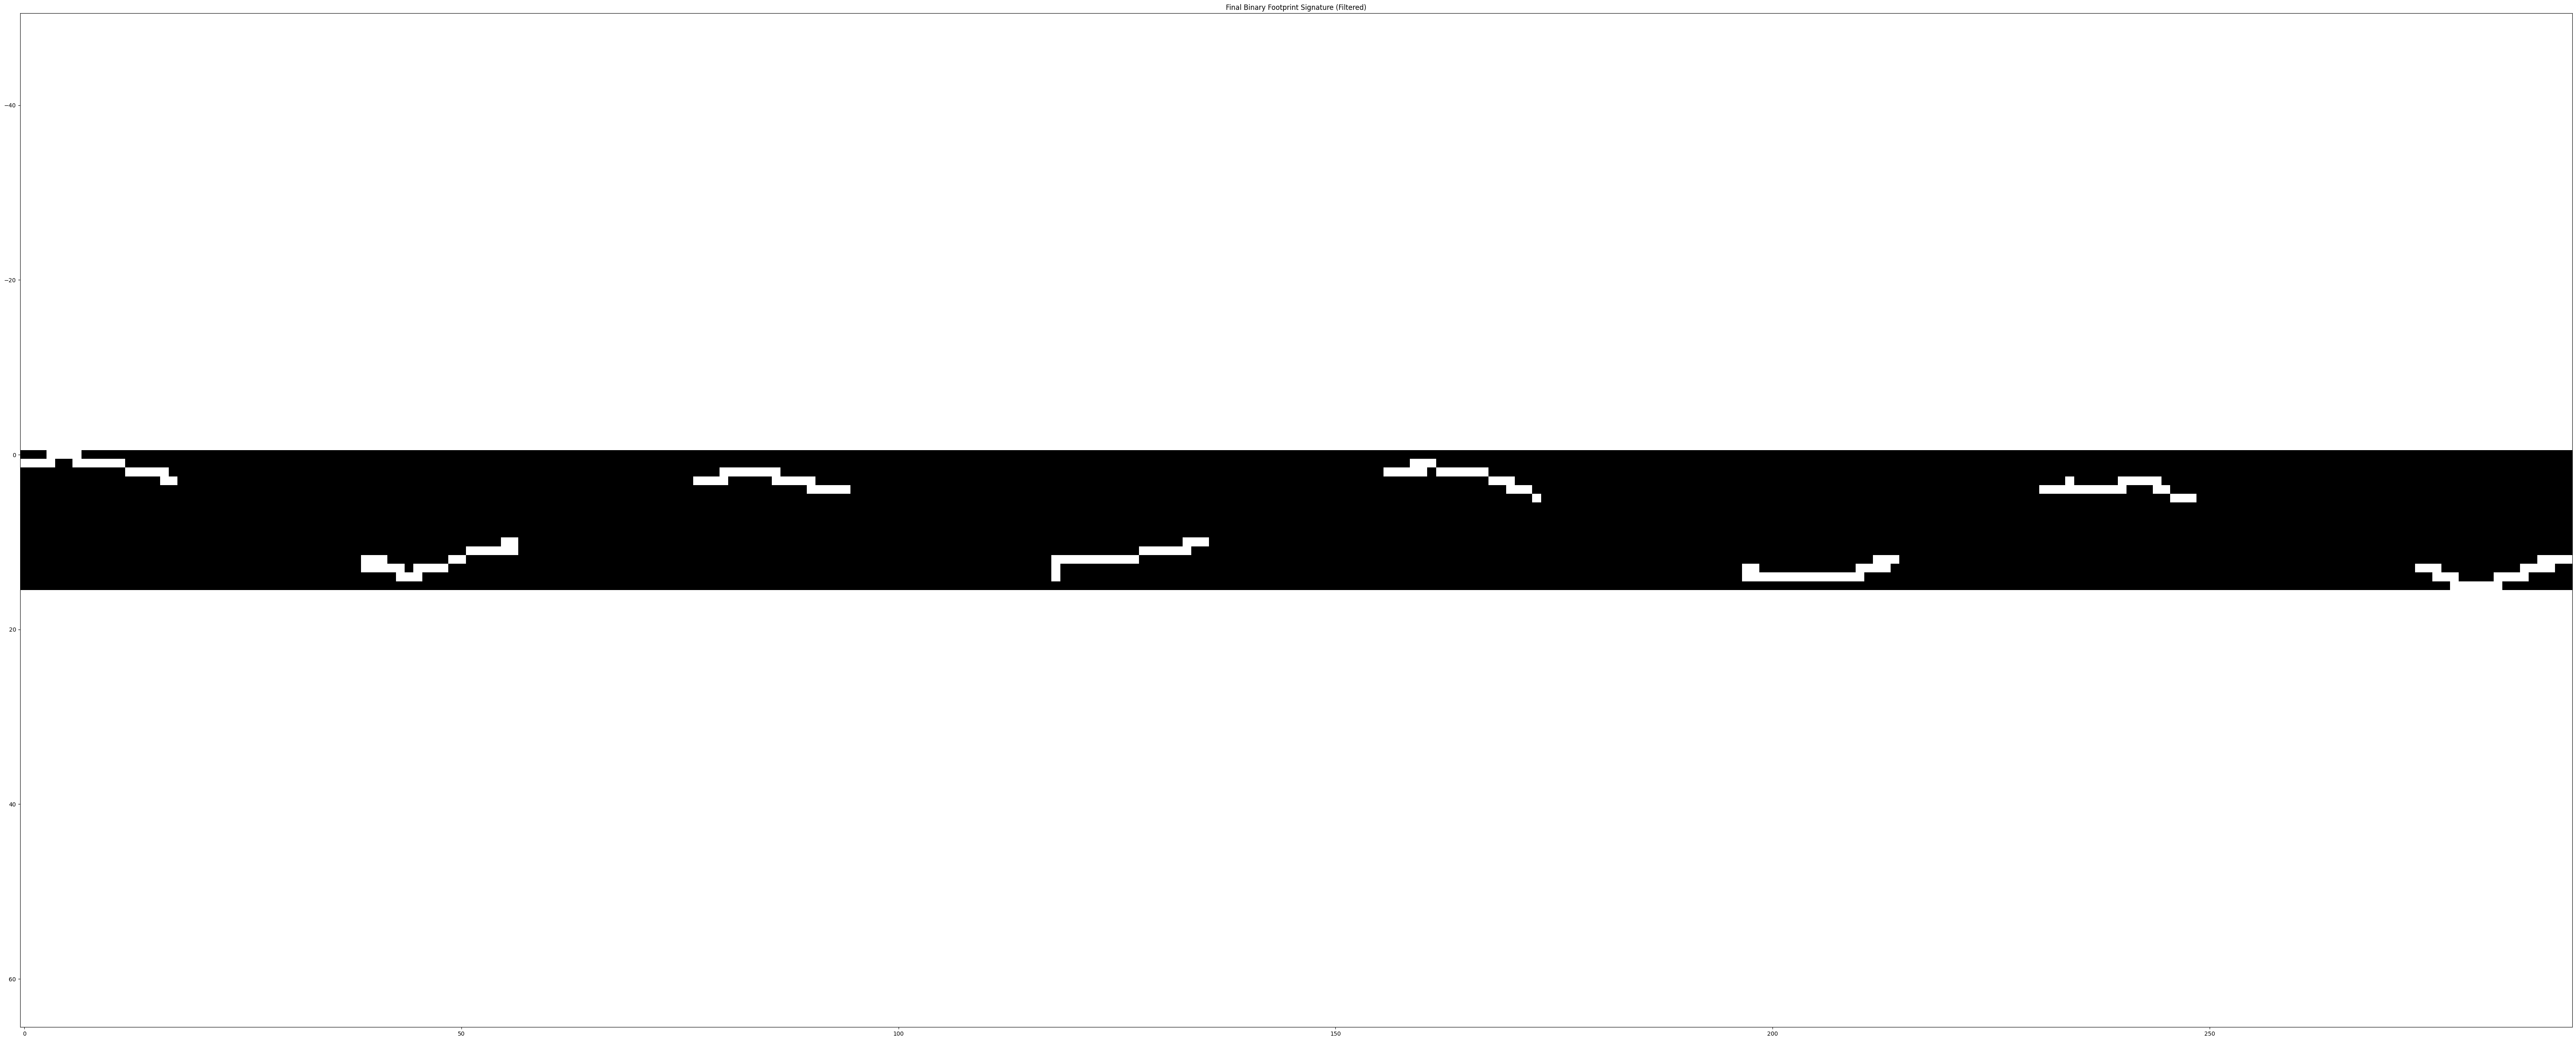

In [ ]:
process_gait_data4('/content/1GaitCop.csv', 820)

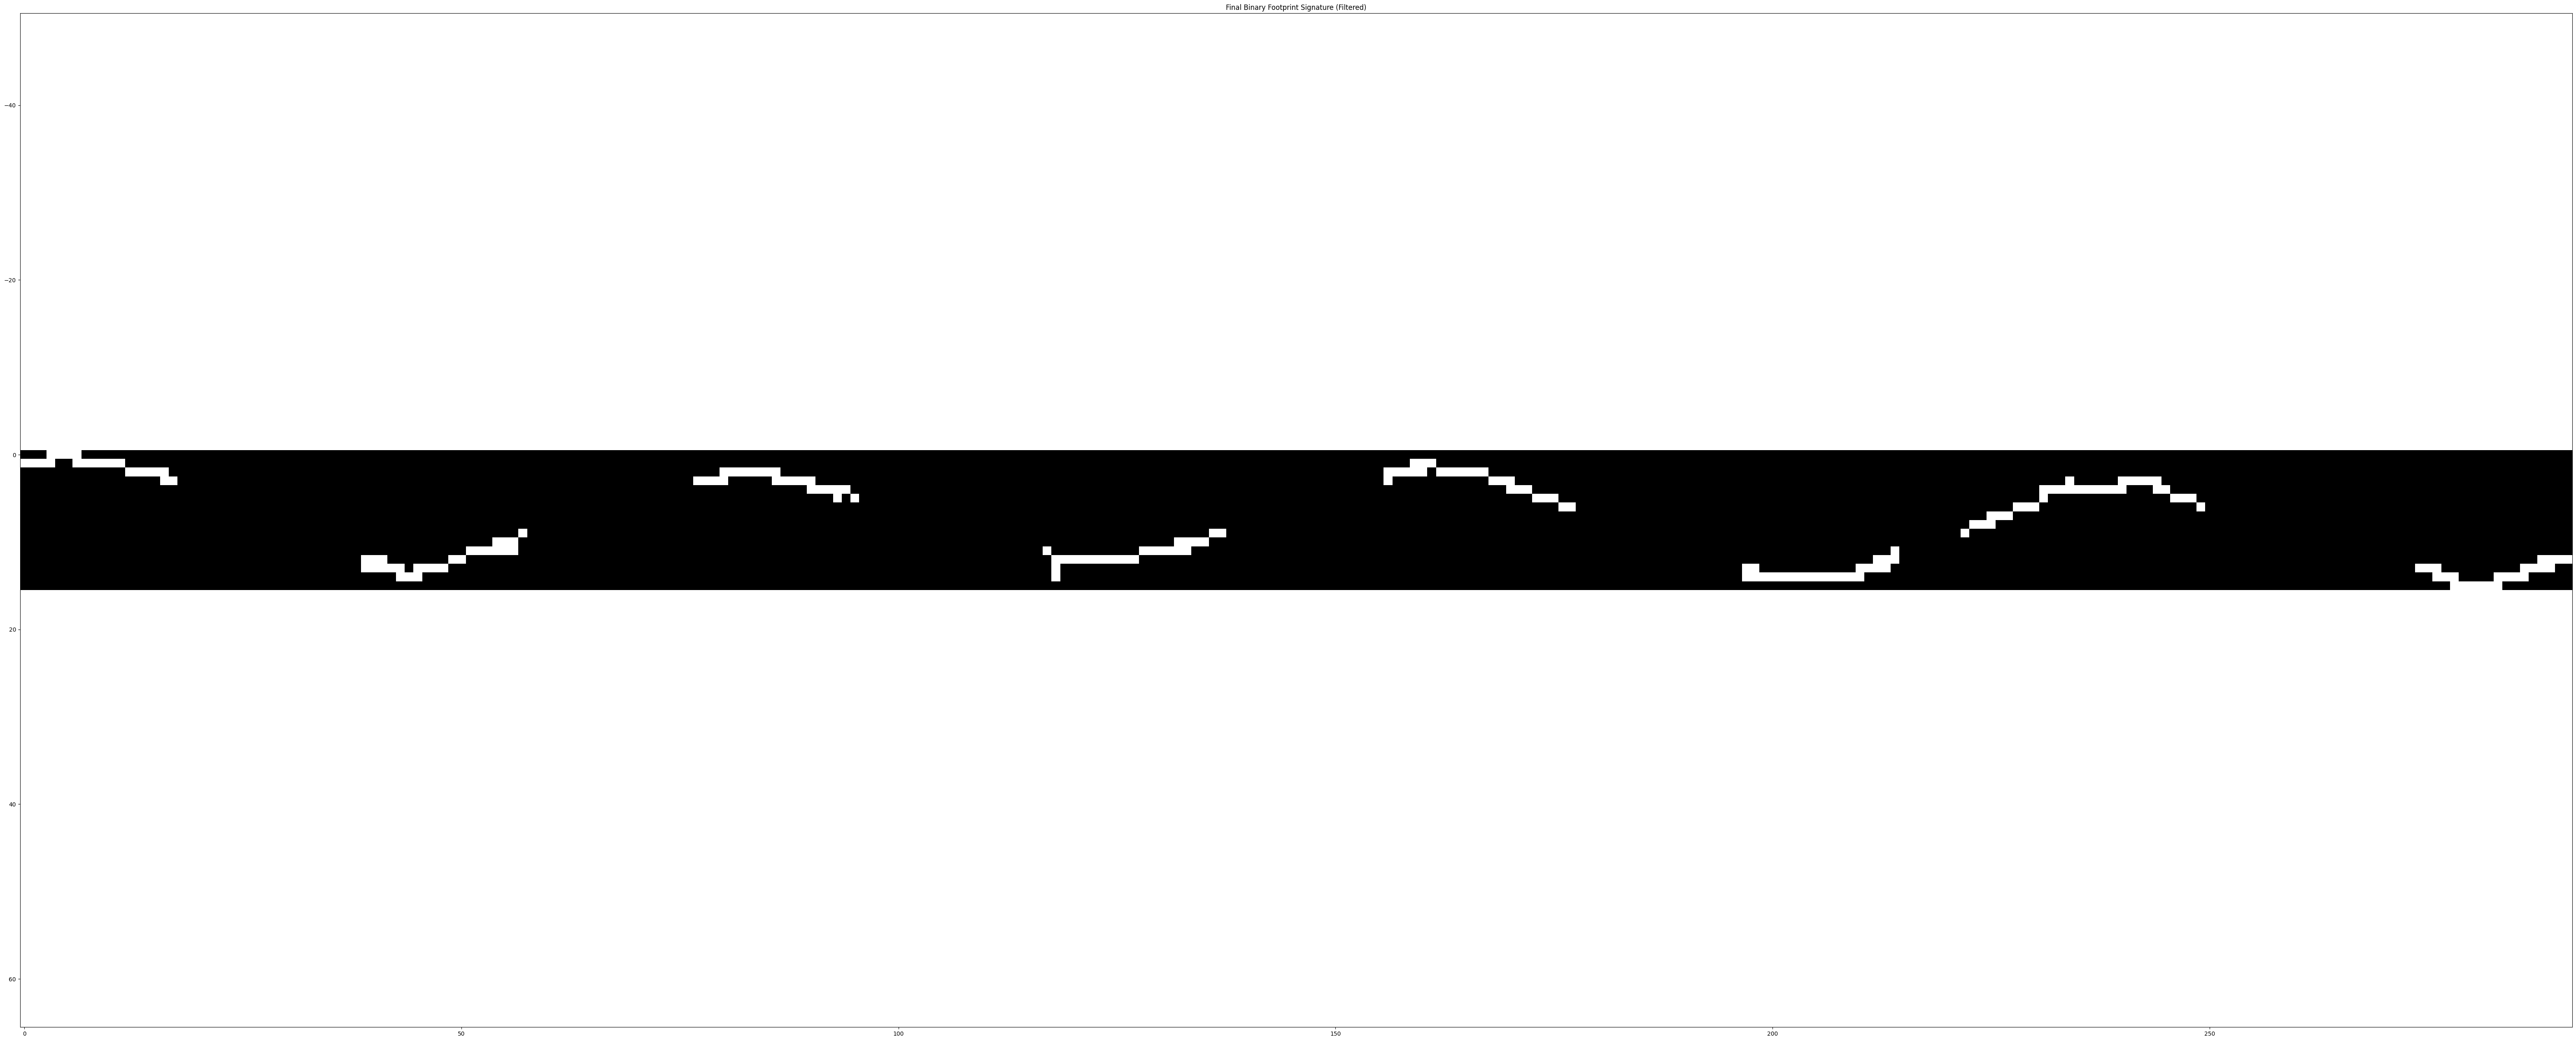

In [ ]:
# Example Usage:
process_gait_data1('/content/1GaitCop.csv')

In [ ]:
@###

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

def process_gait_data5(csv_file, n_rows):
    df = pd.read_csv(csv_file, nrows=n_rows)

    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(subset=['X', 'Y'], inplace=True)

    df['X'] = df['X'].astype(int)
    df['Y'] = df['Y'].astype(int)

    x_min, x_max = df['X'].min(), df['X'].max()
    y_min, y_max = df['Y'].min(), df['Y'].max()

    grid_width = x_max - x_min + 1
    grid_height = y_max - y_min + 1

    footprint_grid = np.zeros((grid_height, grid_width), dtype=np.uint8)

    for x, y in zip(df['X'], df['Y']):
        footprint_grid[y - y_min, x - x_min] = 1

    num_labels, labels = cv2.connectedComponents(footprint_grid, connectivity=8)

    valid_mask = np.zeros_like(footprint_grid)
    trapezoids = []
    for label in range(1, num_labels):
        if np.sum(labels == label) >= 12:
            valid_mask[labels == label] = 1
            ys, xs = np.where(labels == label)
            x_min_box, x_max_box = xs.min(), xs.max()
            y_min_box, y_max_box = ys.min(), ys.max()

            top_left = (x_min_box, y_min_box)
            top_right = (x_max_box, y_min_box)
            bottom_right = (x_max_box - (x_max_box - x_min_box) // 4, y_max_box)
            bottom_left = (x_min_box + (x_max_box - x_min_box) // 2, y_max_box)

            trapezoids.append([top_left, top_right, bottom_right, bottom_left])

    plt.figure(figsize=(80, 32))
    plt.imshow(valid_mask, cmap='gray', origin='upper')
    plt.title("Final Binary Footprint Signature (Filtered)")
    plt.axis('equal')

    for trap in trapezoids:
        trap = np.array(trap)
        plt.plot([trap[i][0] for i in [0, 1, 2, 3, 0]], [trap[i][1] for i in [0, 1, 2, 3, 0]], 'r-', linewidth=3)

    plt.show()


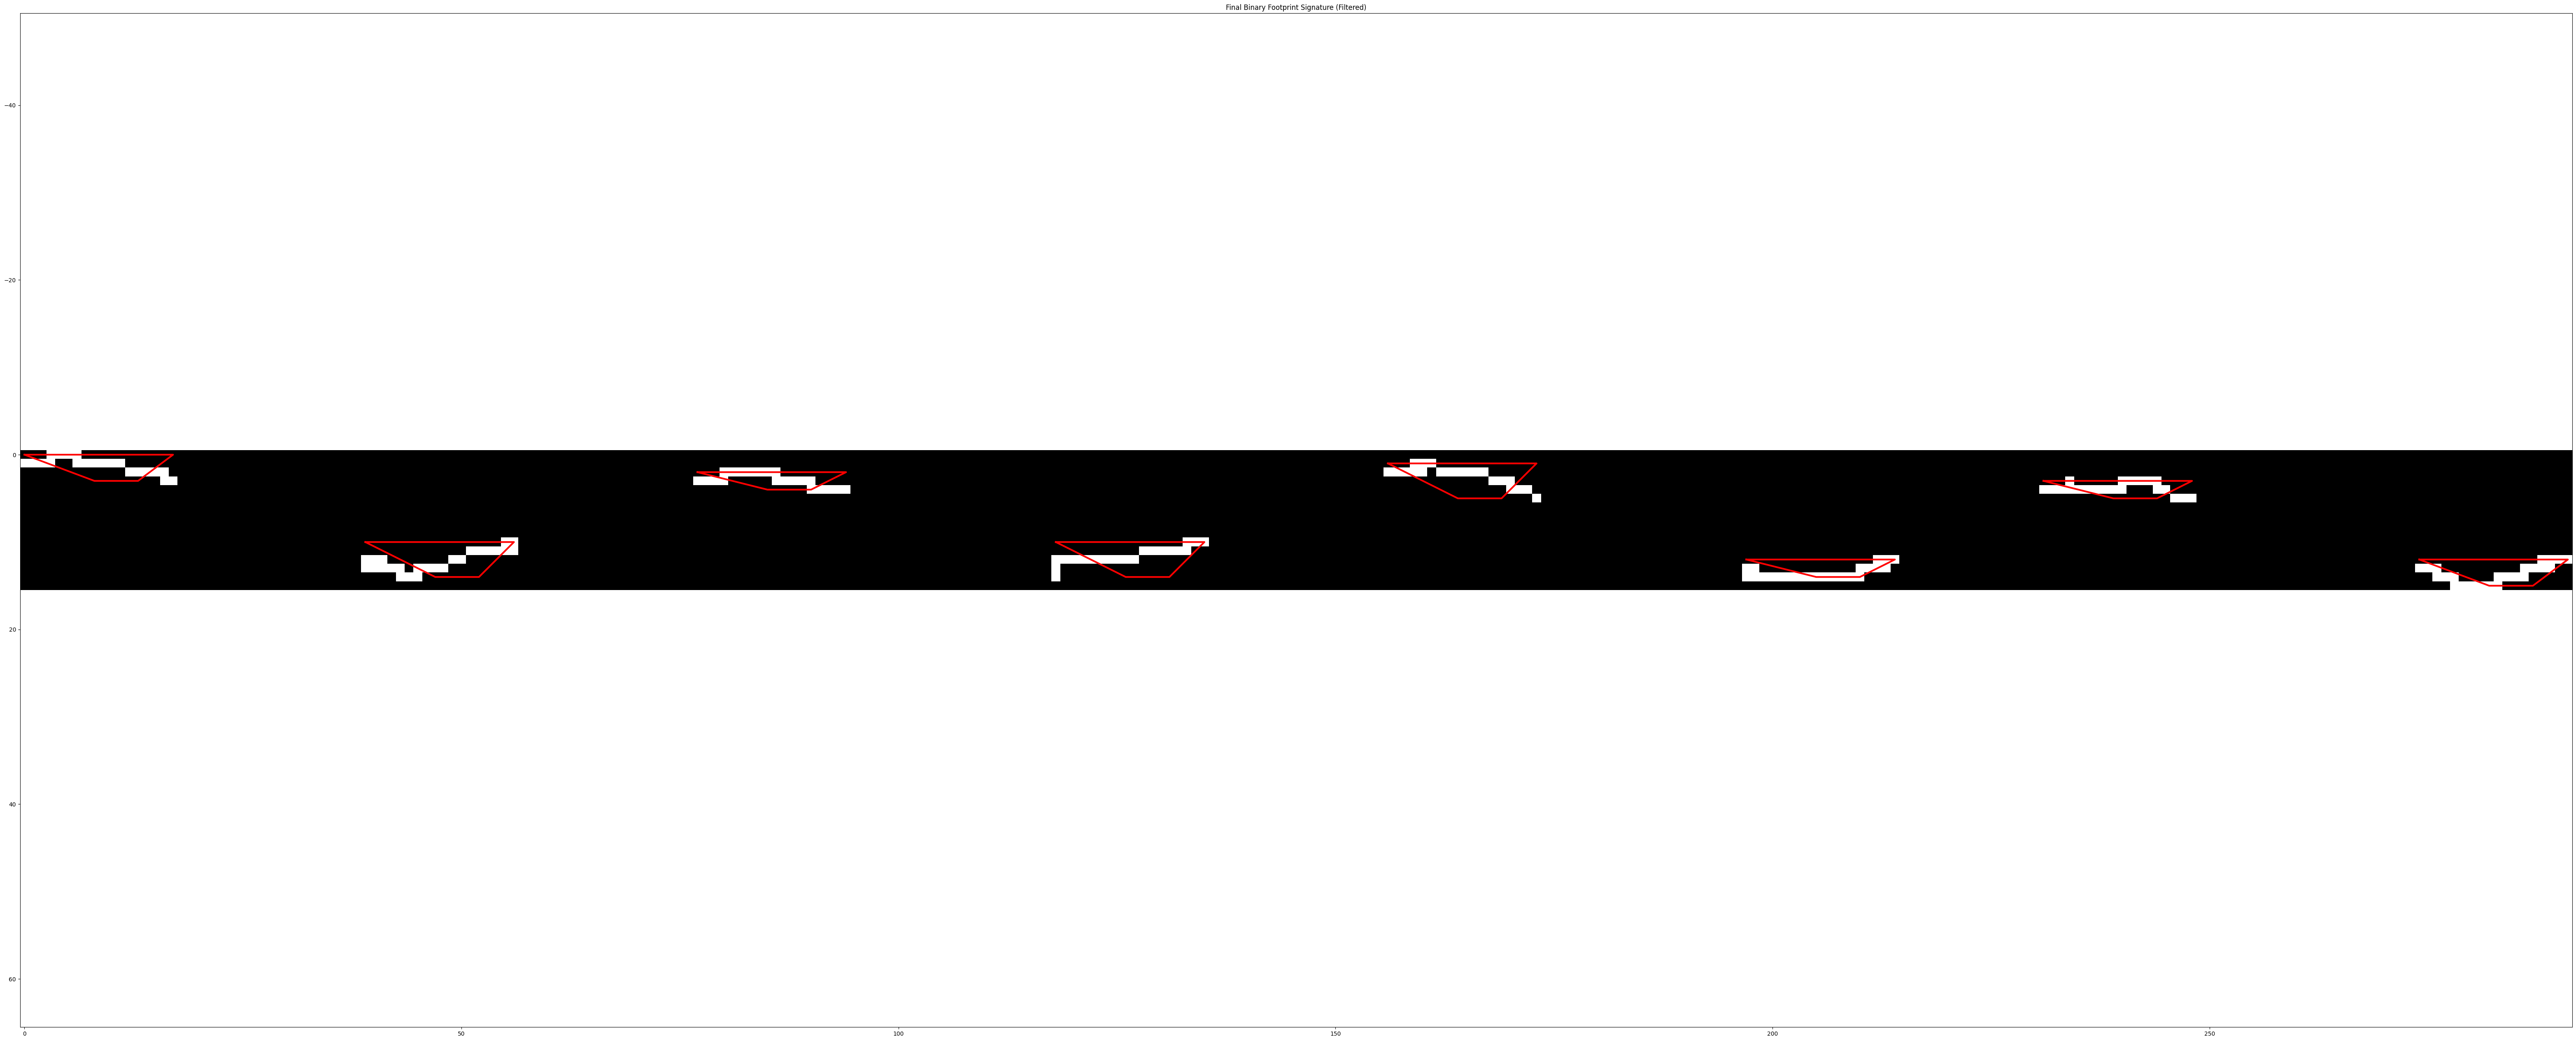

In [35]:
process_gait_data5('/content/1GaitCop.csv', 820)